In [1]:
import numpy as np 

def func_f(b, m):
    return m - np.tanh(b*m)
    
def func_g(b, m, q):
    return q - np.tanh(b*m)**2
    

def J_11(b, m):
    return 1 - (b / (np.cosh(b*m)**2))

    
def J_12(b, m):
    return 1

    
    
def J_21(b, m):
    return 2 * (b / np.cosh(b*m)**2)
    
    
def J_22(b, m):
    return 1

def createJMatrics(b, m):
    return np.array([
        [J_11(b, m), J_12(b, m)],
        [J_21(b, m), J_22(b, m)],
    ])

In [10]:
min = pow(10, -5)

T_arr = np.linspace(0.1, 0.8, 10)
result_arr = []

for i in range(len(T_arr)):
    b = 1/T_arr[i]
    # 初期値
    m = 0.5
    q = 0.5
    
    while True:
        f_g_matrics = np.array([
            [func_f(b, m)], 
            [func_g(b, m, q)]
        ])
        J_matrics = createJMatrics(b, m)
        
        print("J_matrics={0}".format(J_matrics))
        
        delta = np.dot(np.linalg.inv(J_matrics), f_g_matrics)
        print("m_delta={0}, q_delta={1}".format(delta[0][0], delta[1][0]))
        print("\n")
        
        if abs(delta[0][0]) < min and abs(delta[1][0]) < min:
            result_arr.append([T_arr[i], m, q])
            print("T={0}, m={1}, q={2}".format(T_arr[i], m, q))
            break
        
        m = m - delta[0][0]
        q = q - delta[1][0]

J_matrics=[[0.99818417 1.        ]
 [0.00363166 1.        ]]
m_delta=-9.128476702691124e-05, q_delta=-0.49981808525339755


J_matrics=[[0.99818748 1.        ]
 [0.00362504 1.        ]]
m_delta=-0.5025500692778201, q_delta=0.0018211018841323286


J_matrics=[[9.99999922e-01 1.00000000e+00]
 [1.56407595e-07 1.00000000e+00]]
m_delta=0.004644367855013425, q_delta=-0.0020030095367694948


J_matrics=[[9.99999914e-01 1.00000000e+00]
 [1.71632016e-07 1.00000000e+00]]
m_delta=-0.0020030115226729794, q_delta=1.8314163651270327e-09


J_matrics=[[9.99999918e-01 1.00000000e+00]
 [1.64892297e-07 1.00000000e+00]]
m_delta=2.515581365911593e-09, q_delta=-6.807673021065497e-10


T=0.1, m=0.9999999977125065, q=0.9999999910746183
J_matrics=[[0.91943451 1.        ]
 [0.16113099 1.        ]]
m_delta=-0.009409885438357968, q_delta=-0.4841610214633254


J_matrics=[[0.927475 1.      ]
 [0.14505  1.      ]]
m_delta=-0.6149814817661079, q_delta=0.08625741725902825


J_matrics=[[9.99927787e-01 1.00000000e+00]
 [1.

m_delta=0.0027961446369070535, q_delta=-0.0021282056636792797


J_matrics=[[-0.38453411  1.        ]
 [ 2.76906822  1.        ]]
m_delta=0.00315337673908709, q_delta=-0.0009154712328607273


J_matrics=[[-0.38460035  1.        ]
 [ 2.7692007   1.        ]]
m_delta=0.0030741019497609445, q_delta=0.00026694775593553814


J_matrics=[[-0.38461411  1.        ]
 [ 2.76922821  1.        ]]
m_delta=0.002617682786722759, q_delta=0.0012737794764105365


J_matrics=[[-0.38458627  1.        ]
 [ 2.76917254  1.        ]]
m_delta=0.0018882567042066206, q_delta=0.0019999485805438826


J_matrics=[[-0.38454361  1.        ]
 [ 2.76908721  1.        ]]
m_delta=0.0010141278630951623, q_delta=0.002389887664549559


J_matrics=[[-0.38451288  1.        ]
 [ 2.76902576  1.        ]]
m_delta=0.00012561938650395676, q_delta=0.0024381748184839065


J_matrics=[[-0.3845087   1.        ]
 [ 2.76901739  1.        ]]
m_delta=-0.0006638138714820623, q_delta=0.002182932350936978


J_matrics=[[-0.38452987  1.        ]
 [ 2

T, m, q
[[ 1.00000000e-01  9.99999998e-01  9.99999991e-01]
 [ 1.77777778e-01  9.99974991e-01  9.99947602e-01]
 [ 2.55555556e-01  9.99193839e-01  9.98394801e-01]
 [ 3.33333333e-01 -5.97428483e-06 -4.26944607e-05]
 [ 4.11111111e-01  1.17274058e-05  1.96800473e-05]
 [ 4.88888889e-01 -4.90317165e-07  4.63935371e-05]
 [ 5.66666667e-01  1.38566051e-05  1.06506735e-05]
 [ 6.44444444e-01 -8.31828060e-06  3.59250719e-05]
 [ 7.22222222e-01  2.76308342e-05  1.78879843e-05]
 [ 8.00000000e-01  4.08419019e-05  1.52648264e-05]]


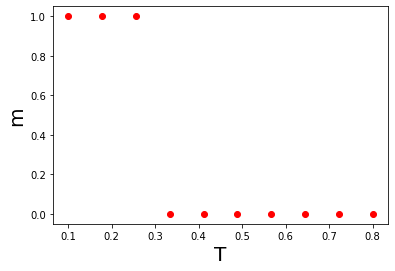

In [11]:
result_arr = np.array(result_arr)

result_arr_t = result_arr[:, 0]
result_arr_m = result_arr[:, 1]
result_arr_q = result_arr[:, 2]

import matplotlib.pyplot as plt

fig = plt.figure()
ax_3 = fig.add_subplot(111)

ax_3.set_xlabel("T", size = 20)
ax_3.set_ylabel("m", size = 20)

ax_3.scatter(result_arr_t, result_arr_m, color="red")

print("T, m, q")
print(result_arr)